# DEMONSTRATIVE PYTHON DATA PROJECT

### Data Set used: Smartphones

In [1]:
#importing packages
from mpl_toolkits import mplot3d
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
#reading csv file
df = pd.read_csv('smartphones.csv')
df

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


# Cleaning
Let's clean the data of anything samples that's missing any data values. 

Basically, any values that are marked as 'None' are marked with a NaN, a numeric data type that represents an undefined or unrepresentable value. This will allow it to be excluded from representation as it would cause errors in the data analysis process.

In [3]:
#this helper function replaces all string values to np.NaN
def isUnknownFloat(s):
    if type(s) == float:
        if None in s:
            return np.NaN
        else:
            return s
    else:
        return s
#cleaning the "unknown" values in the dataframe when it's applied to string functions
def isUnknownString(s):
    if type(s) == str:
        if 'Unknown' in s:
            return np.NaN
        else:
            return s
    else:
        return s
#creating a copy of the dataframe
cleaned = df.copy(deep=True)
#cleaning the "unknown" values in the dataframe
for i in list(df.columns):
    cleaned[i] = cleaned[i].apply(isUnknownString)
cleaned

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


In [4]:
#checks for any duplicated data entries
print(cleaned.duplicated().sum())
cleaned.drop_duplicates()

0


,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


## Outlier Detection 
By using boxplots and histograms, this also allows me to take a look at the distribution of the dataset I'm getting.

<Axes: xlabel='Final Price'>

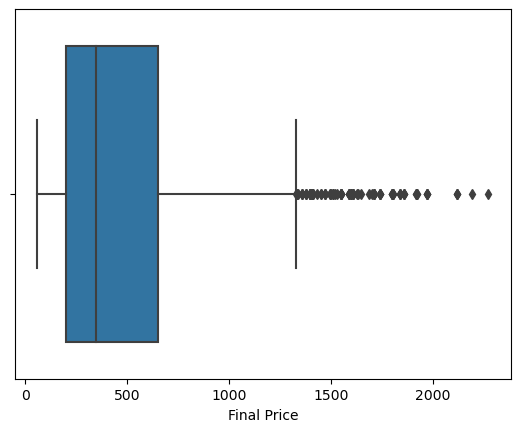

In [5]:
#Inspects the distribution of the Final Price value with a box plot
sns.boxplot(x=cleaned['Final Price'])

C:\Users\sides\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


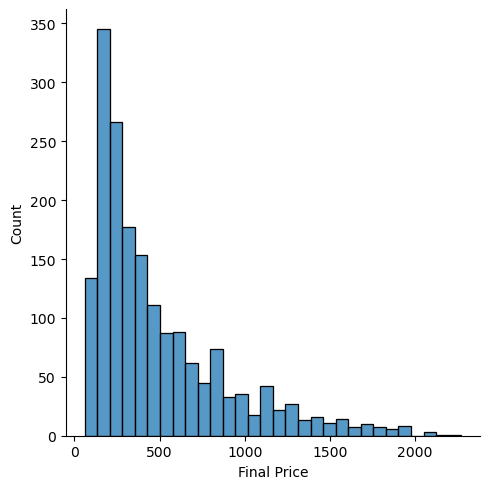

In [6]:
#Inspects the distribution of the Final Price value with a histogram
sns.displot(data=cleaned['Final Price'])

Seen in both the boxplot and the histogram, the data here is heavily skewed to the left, leaning on the cheaper side.

## Outlier Removal

As the upper quantile is filled with an incredibly high number of outliers, I would safely say that eliminating the top 10% of the data would be a safe choice.

In [7]:
data_filtered_quantile_0 = df[df['Final Price']<df['Final Price'].quantile(0.9)]
data_filtered_quantile_0.reset_index()

,index,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...,...
1629,1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1630,1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1631,1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1632,1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


However, if one wants to be safe, they could only just eliminate the top and bottom 1% if the variables that appear to be outliers seem to still hold relevance to the data

,index,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...,...
1791,1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1792,1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1793,1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1794,1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


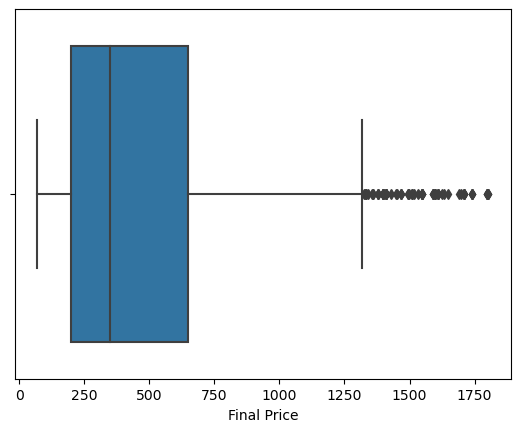

In [8]:
#cleaning by eliminating the top and bottom 1% quantiles
#print(cleaned.duplicated().sum())

q_low = cleaned["Final Price"].quantile(0.00)
q_hi  = cleaned["Final Price"].quantile(0.99)
data_filtered_quantile_1 = cleaned[(cleaned["Final Price"] < q_hi) & (cleaned["Final Price"] > q_low)]
data_filtered_quantile_1
sns.boxplot(x=data_filtered_quantile_1['Final Price'])
data_filtered_quantile_1.reset_index()

In [9]:
data_filtered_quantile_0
data_filtered_quantile_1

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


There is still an absurd number of outliers in the data we can see plotted above, so it would be safer to go with the initial outlier removal method.

# Data Exploration

A look at what the data entails and what the relationships between the variables look like on the graph

<Axes: title={'center': 'Final Price vs. Storage (first data filtering method)'}, xlabel='Final Price', ylabel='Storage'>

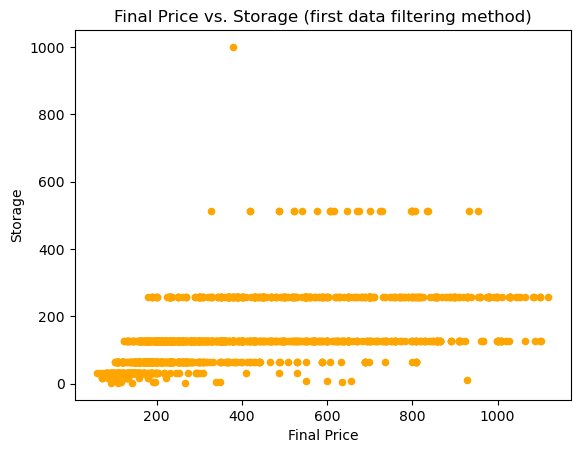

In [10]:
StoragePlot = data_filtered_quantile_0.groupby('Final Price').count()[['Storage']].reset_index()
data_filtered_quantile_0.plot.scatter('Final Price', 'Storage', title='Final Price vs. Storage (first data filtering method)', color = 'orange')

<Axes: title={'center': 'Final Price vs. Storage (second data filtering method)'}, xlabel='Final Price', ylabel='Storage'>

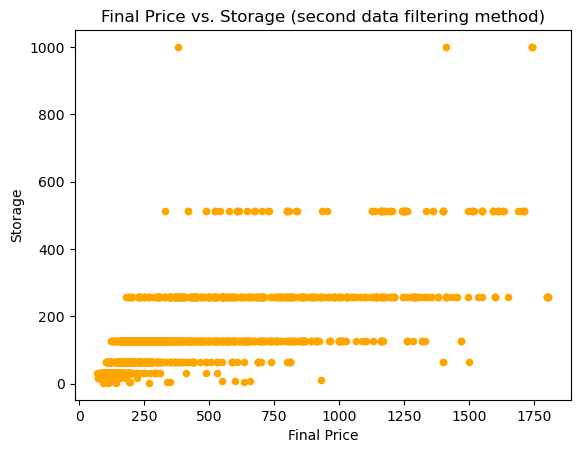

In [11]:
StoragePlot = data_filtered_quantile_1.groupby('Final Price').count()[['Storage']].reset_index()
data_filtered_quantile_1.plot.scatter('Final Price', 'Storage', title='Final Price vs. Storage (second data filtering method)', color = 'orange')

<Axes: title={'center': 'Final Price vs. Storage (no data filtering)'}, xlabel='Final Price', ylabel='Storage'>

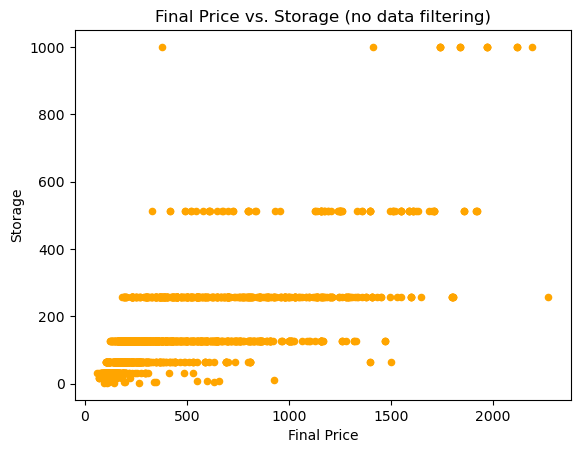

In [12]:
df.plot.scatter('Final Price', 'Storage', title='Final Price vs. Storage (no data filtering)', color = 'orange')

<Axes: title={'center': 'Final Price vs. RAM (first data filtering method)'}, xlabel='Final Price', ylabel='RAM'>

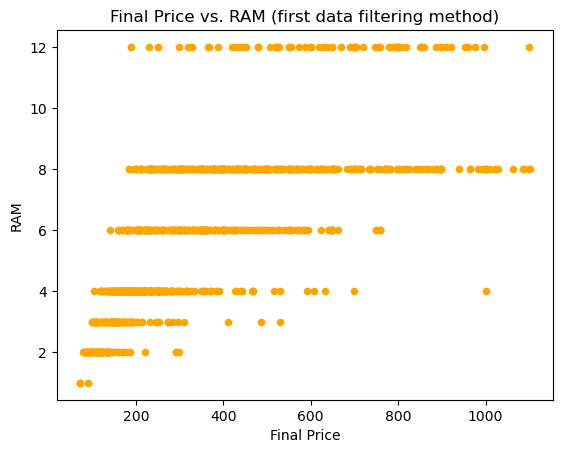

In [13]:
RAMPlot = data_filtered_quantile_0.groupby('Final Price').count()[['RAM']].reset_index()
data_filtered_quantile_0.plot.scatter('Final Price', 'RAM', title='Final Price vs. RAM (first data filtering method)', color = 'orange')

<Axes: title={'center': 'Final Price vs. Storage (second data filtering method)'}, xlabel='Final Price', ylabel='Storage'>

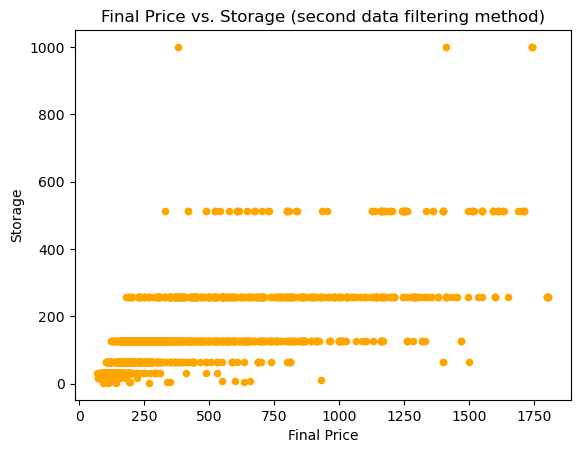

In [14]:
StoragePlot2 = data_filtered_quantile_1.groupby('Final Price').count()[['Storage']].reset_index()
data_filtered_quantile_1.plot.scatter('Final Price', 'Storage', title='Final Price vs. Storage (second data filtering method)', color = 'orange')

<Axes: title={'center': 'Relationship between RAM and Storage of devices (first data filtering method)'}, xlabel='RAM', ylabel='Storage'>

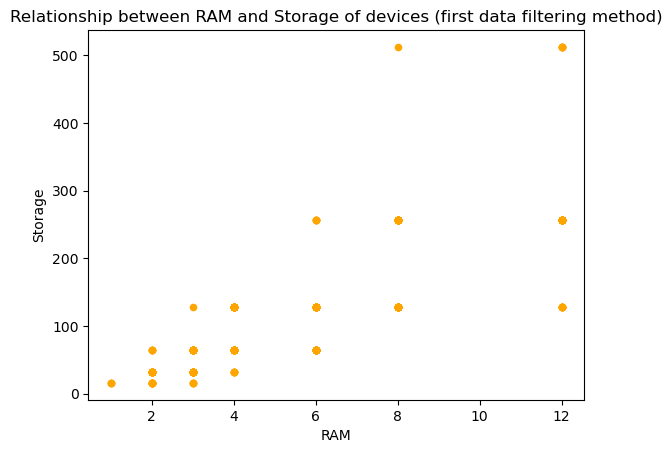

In [15]:
RamStoragePlot0 = data_filtered_quantile_0.groupby('RAM').count()[['Storage']]
RamStoragePlot0 = RamStoragePlot0.sort_values('RAM').reset_index()
data_filtered_quantile_0.plot.scatter('RAM', 'Storage', title='Relationship between RAM and Storage of devices (first data filtering method)', color = 'orange')

<Axes: title={'center': 'Relationship between RAM and Storage of devices (second data filtering method)'}, xlabel='RAM', ylabel='Storage'>

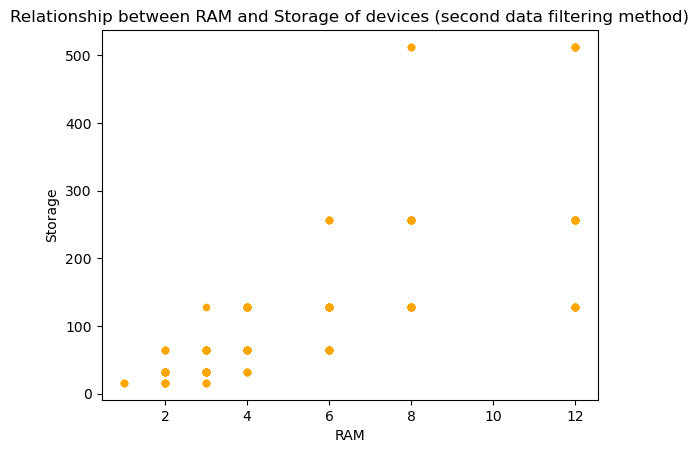

In [16]:
RamStoragePlot1 = data_filtered_quantile_1.groupby('RAM').count()[['Storage']]
RamStoragePlot1 = RamStoragePlot1.sort_values('RAM').reset_index()
data_filtered_quantile_1.plot.scatter('RAM', 'Storage', title='Relationship between RAM and Storage of devices (second data filtering method)', color = 'orange')

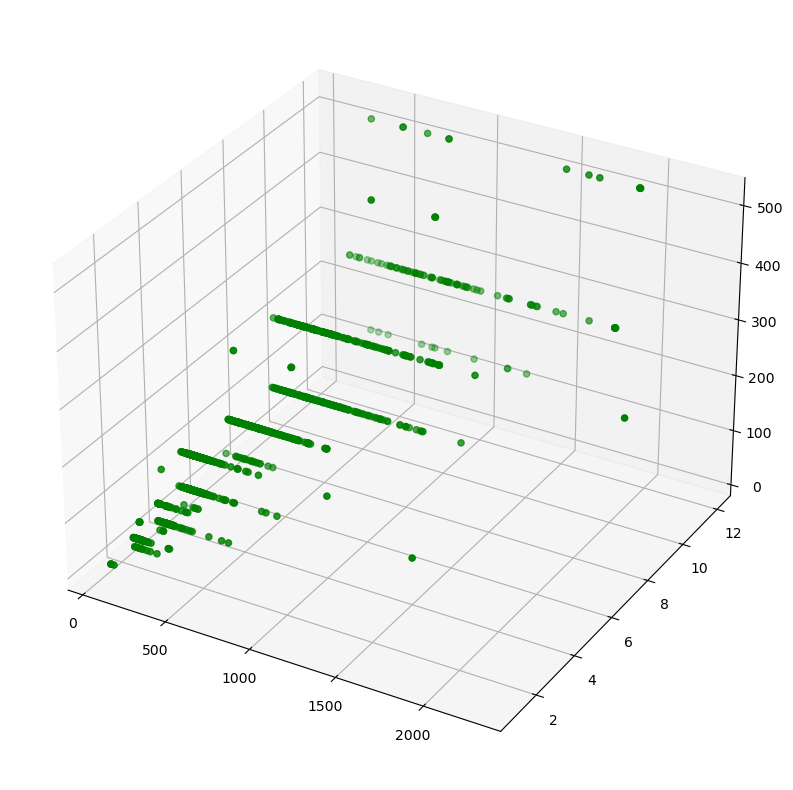

In [17]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
ax.scatter3D(df['Final Price'], df['RAM'], df['Storage'], color = "green")
plt.show()

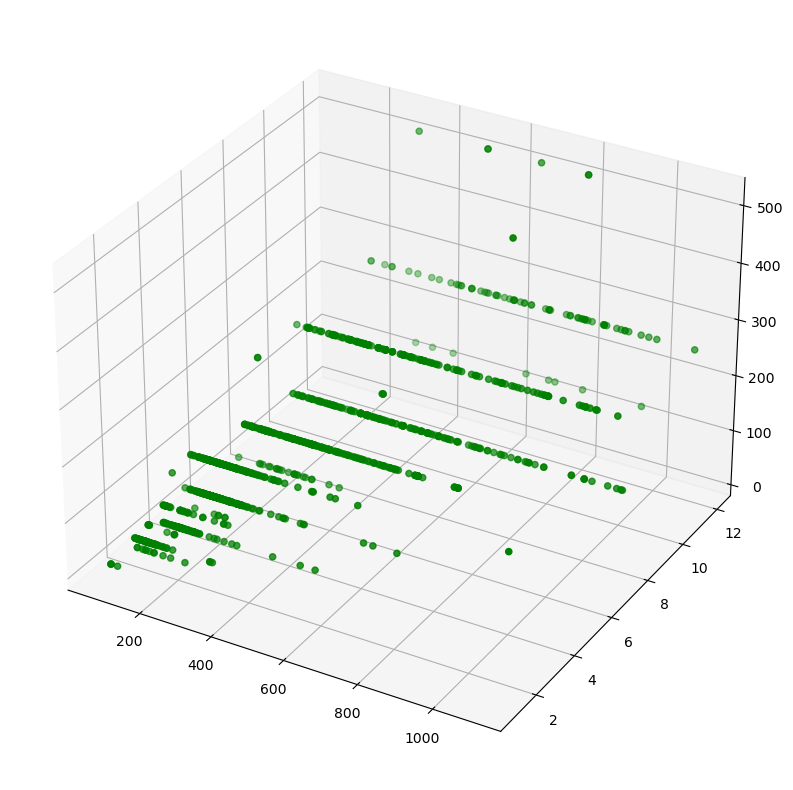

In [18]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
ax.scatter3D(data_filtered_quantile_0['Final Price'], data_filtered_quantile_0['RAM'], data_filtered_quantile_0['Storage'], color = "green")
plt.show()

In [19]:
test= df.groupby(['Brand','Model'])
test.size()
test2= df.groupby(['Smartphone'])
test2.size()

Smartphone
ASUS ZenFone 9 5G 8/128GB Negro Medianoche Libre    1
Alcatel 1 (2021) 1/16GB Azul Libre                  1
Alcatel 1 (2021) 1/16GB Negro Libre                 1
Alcatel 1B 2/32GB Negro Libre                       1
Alcatel 1B 2022 2/32GB Azul Libre                   1
                                                   ..
realme 8 5G 6/128GB Azul Libre                      1
realme 8 5G 6/128GB Negro Libre                     1
realme 8 6/128GB Negro Punk Libre                   1
realme C21 3/32GB Azul Libre                        1
realme X3 SuperZoom 12/256GB Blanco Ártico Libre    1
Length: 1816, dtype: int64

# Handling Missing Data

The method I will be using to handle missing data is to remove any rows of data that have any missing values. However, this is not always applicable, as the data that is not missing from the other rows could also be relevant. For the sake of demonstration, though, we will remove this.

In [20]:
#From the first data cleaning
print(data_filtered_quantile_0.isnull().sum().sum())
data_missing_handled_0_0 = data_filtered_quantile_0.dropna()
data_missing_handled_0_0.reset_index(drop = False)

372


,index,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...,...
1282,1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1283,1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1284,1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1285,1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


493


C:\Users\sides\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


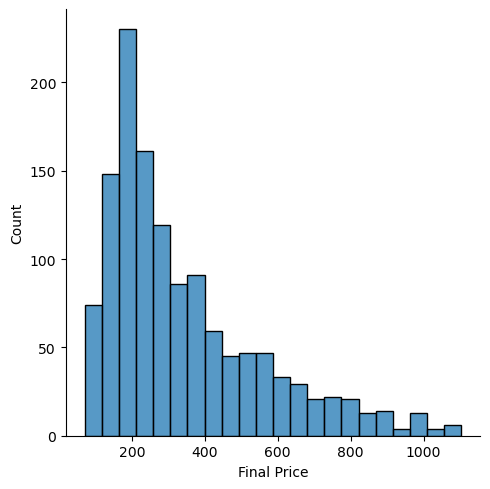

In [21]:
#from the second data cleaning
print(data_filtered_quantile_1.isnull().sum().sum())
data_missing_handled_1_0 = data_filtered_quantile_0.dropna()
data_missing_handled_1_0.reset_index()
sns.displot(data=data_missing_handled_1_0['Final Price'])

# Hypothesis Testing Demonstration (and conclusions)
Hypothesis 1 and 2 will be checking for the mean values of two parameters and seeing if they are anywhere near what was arbitrarily predicted in the value.

## Hypothesis 1 (Prediction of Mean value)
####  H0 / Null Hypothesis: The average storage of phones in this set is equal to 128 GB
#### H1 / Alternative Hypothesis: The average storage of phones in this set is not equal to 128 GB
Significance Level : 0.95

In [22]:
storageColumn = data_missing_handled_0_0[["Storage"]]
statistic, pvalue  = stats.ttest_1samp(storageColumn,128)
print(pvalue)

[0.83993764]


## Conclusion 1

In [23]:
if pvalue < 0.05: #if the P-value is less than the difference between the significance level and 1, we can reject the null hypothesis
    print('Conclusion: Reject null hypothesis: The average storage of phones in this set is equal to 128 GB with a 5% margin of error')
else:
    print('Conclusion: Fail to reject null hypothesis: The average storage of phones in this set is not equal to 128 GB with a 5% margin of error')

Conclusion: Fail to reject null hypothesis: The average storage of phones in this set is not equal to 128 GB with a 5% margin of error


## Hypothesis 2 (Prediction of Mean value)
####  H0 / Null Hypothesis: The average Final Price of phones in this set is not equal to \$400
#### H1 / Alternative Hypothesis: The average Final Price of phones in this set is equal to \$400
Significance Level : 0.95

In [24]:
FinalPriceColumn = data_missing_handled_0_0[["Final Price"]]
statistic, pvalue  = stats.ttest_1samp(FinalPriceColumn,400)
print(pvalue)

[1.92008687e-21]


## Conclusion 2

In [25]:
if pvalue < 0.05: #if the P-value is less than the difference between the significance level and 1, we can reject the null hypothesis
    print('Conclusion: Reject null hypothesis: The average Final Price of phones in this set is equal to $400 with a 5% margin of error')
else:
    print('Conclusion: Fail to reject null hypothesis: The average Final Price of phones in this set is not equal to $400 with a 5% margin of error')

Conclusion: Reject null hypothesis: The average Final Price of phones in this set is equal to $400 with a 5% margin of error


## Hypothesis 3 (Prediction of Variable dependency)
####  H0 / Null Hypothesis: The RAM of the phone is independent to the storage capacity of the device.
#### H1 / Alternative Hypothesis: The RAM of the phone is dependent on the storage and vice versa
Significance Level : 0.9 (90%)

We can use a chi-square test to determine whether two variables are independent. The null hypothesis in this case is that the two variables are independent.

In [26]:
observed = pd.crosstab(data_missing_handled_1_0['RAM'], data_missing_handled_1_0['Storage'])
chi2, p, dof, expected = chi2_contingency(observed)
print(p)
if p < 0.1: #if the P-value is less than the difference between the significance level and 1, we can reject the null hypothesis
    print('Reject null hypothesis: the variables are dependent on each other. There is a relationship between the RAM and the Storage of the phones manufactured.')
else:
    print('Fail to reject null hypothesis: the variables are independent of each other. There is no relationship between the RAM and the Storage of the phones manufactured.')

0.0
Reject null hypothesis: the variables are dependent on each other. There is a relationship between the RAM and the Storage of the phones manufactured.


## Conclusion 3

In Hypothesis 3, since the p-value is rounded down to 0.0, which is less than the significance value of 10%, I reject the null hypothesis that there is no relationship between the given RAM and storage capacity of the device. As shown in the Data Exploration graph above, there seems to be no linear relationship between the RAM and storage capacity. However, overall, as the storage increases, the range at which the RAM can vary not only expands, but goes up in average.